In [7]:
import pandas as pd

titanic = pd.read_csv('data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [10]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

* 'PassengerId': '생존여부', 'Survived' : 생존여부(0-사망, 1-생존), 
* 'Pclass' : 객실등급 , 'Name' : 승객이름, 'Sex' : 성별, 'Age' : 나이, 'SibSp' : 함께 탑tmd안 형재와 배우자 수, 
* 'Parch' : 함께 탑승한 부모, 아이의 수, 'Ticket' : 티켓번호, 'Fare' : 요금, 'Cabin' : 객실번호, 'Embarked' : 탑승항구


### 결측치
* 결측치 데이터 : 삭제, 다른값 대체

In [12]:
# 결측치 확인하기

# titanic['Age'].isnull() -> 특정 열만 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# 결측데이터가 너무 많으면 데이터 분석에 의미가 없기 때문에 삭제한다.
# 결측데이터 삭제, Cabin 삭제

titanic.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
# 결측데이터 최빈값으로 대체하기

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
titanic['Embarked'].fillna('S', inplace=True)

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [24]:
# 결측데이터 평균값으로 대체
# 나이 열

titanic['Age'].mean()

np.float64(29.69911764705882)

In [26]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

C:\Users\jwpyu\AppData\Local\Temp\ipykernel_29440\1013071036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [27]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 데이터 그룹핑
* 항구별 객실등급 개수 출력
* 객실 등급별 성별, 나이, 요금의 평균 구하기

In [35]:
# 항구별 객실등급 개수 출력

dataEmbarked = titanic.groupby('Embarked',as_index=False)[['Pclass']].count()
dataEmbarked

,Embarked,Pclass
0,C,168
1,Q,77
2,S,646


<Axes: xlabel='Embarked'>

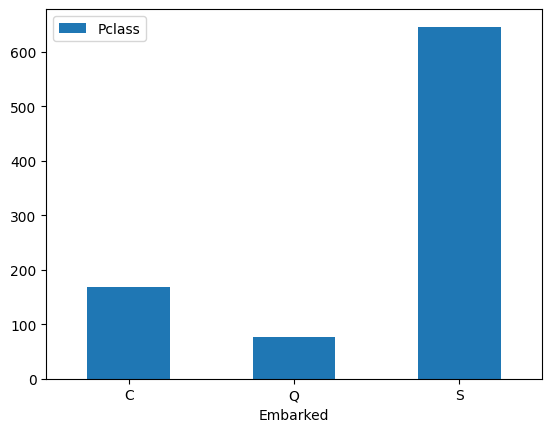

In [43]:
# 판다스를 이용한 시각화
# df.plot(x,y)

dataEmbarked.plot(kind='bar', x='Embarked', rot=0)          # rot ->(글자)각도

In [34]:
# 객실 등급별 성별, 나이 요급의 평균 계산

titanic.groupby(['Embarked','Sex'], as_index=False)[['Fare','Age']].mean().sort_values('Fare',ascending=False)

,Embarked,Sex,Fare,Age
0,C,female,75.169805,28.566978
1,C,male,48.262109,32.095759
4,S,female,39.143456,28.148220
5,S,male,21.711996,30.193391
3,Q,male,13.838922,30.182389
2,Q,female,12.634958,27.896634


In [45]:
datasex = titanic.groupby(['Sex'], as_index=False)[['Fare','Age']].mean().sort_values('Fare',ascending=False)

<Axes: xlabel='Sex'>

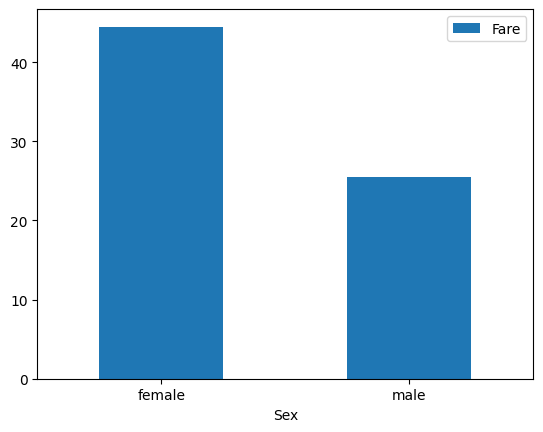

In [48]:
datasex.plot(kind='bar', x='Sex', rot=0, y='Fare')

In [37]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 101.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 91.1 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


### 객실등급별 생존여부 현황 그래프 생성

In [49]:
# 1단계: 시각화 라이브러리 불러오기

import matplotlib.pyplot as plt


In [57]:
# 2단계: 표시할 데이터셋 정하기
# 0,1

data0 = titanic.query('Survived==0').groupby('Pclass')[['Name']].count()
print(data0)
data1 = titanic.query('Survived==1').groupby('Pclass')[['Name']].count()
print(data1)

data = pd.merge(data0,data1,on='Pclass')
data.columns=['Death','Live']
data

        Name
Pclass      
1         80
2         97
3        372
        Name
Pclass      
1        136
2         87
3        119


,Death,Live
Pclass,,
1,80,136
2,97,87
3,372,119


In [66]:
# 한글코드 불러오기
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

<function matplotlib.pyplot.show(close=None, block=None)>

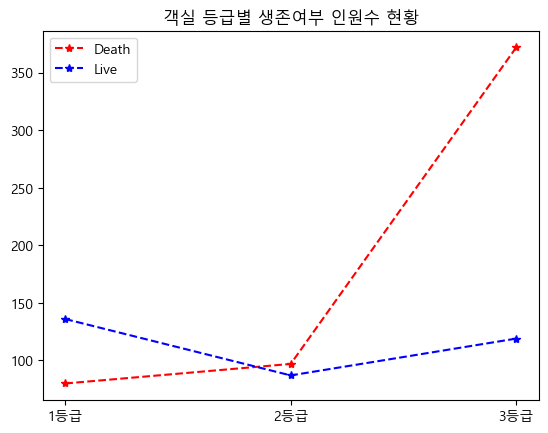

In [70]:
# 3단계: plot() 함수에 데이터 입력

plt.plot(data.index,data['Death'], marker='*', linestyle='--', color='red', label='Death')
plt.plot(data.index,data['Live'], marker='*', linestyle='--', color='blue', label='Live')
plt.xticks(data.index, ['1등급','2등급','3등급'])
plt.title('객실 등급별 생존여부 인원수 현황')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

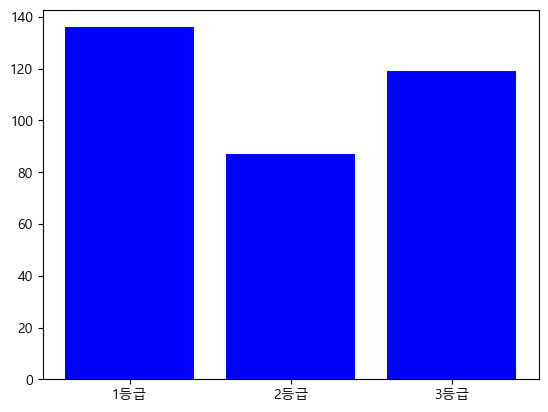

In [72]:
# 막대그래프: 생존자

plt.bar(data.index,data['Live'], color='blue', label='Live')
plt.xticks(data.index, ['1등급','2등급','3등급'])
plt.show